In [6]:
#Q.no1 Automated vacuum cleaner reflex agent

class VacuumCleaner:
    def __init__(self, environment):
        """
        room conditions{'A': 'dirty', 'B': 'clean'}
        """
        self.environment = environment
        self.current_location = 'A'  # Starting location of the vacuum cleaner

    def sense_environment(self):
        """
        Check the current location's state.
        """
        return self.environment[self.current_location]

    def clean(self):
        """
        Clean the current location.
        """
        print(f"Cleaning {self.current_location}...")
        self.environment[self.current_location] = 'clean'

    def move(self):
        """
        Move to the next location.
        """
        if self.current_location == 'A':
            self.current_location = 'B'
        else:
            self.current_location = 'A'
        print(f"Moved to {self.current_location}.")

    def reflex_agent(self):
        """
        Reflex agent logic:
        - If the current location is dirty, clean it.
        - Otherwise, move to the next location.
        """
        if self.sense_environment() == 'dirty':
            self.clean()
        else:
            self.move()

    def run(self, steps=10):
        """
        Run the vacuum cleaner for a specified number of steps.
        :param steps: Number of steps to run.
        """
        for step in range(steps):
            print(f"Step {step + 1}:")
            self.reflex_agent()
            print(f"Environment state: {self.environment}")
            print("-" * 20)


# Example usage:
if __name__ == "__main__":
    # Initial environment state
    environment = {'A': 'dirty', 'B': 'dirty'}

    # Create the vacuum cleaner
    vacuum = VacuumCleaner(environment)

    # Run the vacuum cleaner
    vacuum.run(steps=5)


Step 1:
Cleaning A...
Environment state: {'A': 'clean', 'B': 'dirty'}
--------------------
Step 2:
Moved to B.
Environment state: {'A': 'clean', 'B': 'dirty'}
--------------------
Step 3:
Cleaning B...
Environment state: {'A': 'clean', 'B': 'clean'}
--------------------
Step 4:
Moved to A.
Environment state: {'A': 'clean', 'B': 'clean'}
--------------------
Step 5:
Moved to B.
Environment state: {'A': 'clean', 'B': 'clean'}
--------------------


In [8]:
#Q no.2 Improve the vacuum cleaning agent’s efficiency by implementing a model-based agent
#A model-based vacuum cleaning agent maintains an internal representation of the environment, enabling it to make smarter decisions and avoid unnecessary actions.
#This approach is more efficient because the agent doesn't repeatedly visit clean areas or perform redundant cleaning.
#Instead, it remembers which areas are clean and focuses on dirty areas.
#Memory of the Environment:Tracks the state of all rooms.Avoids revisiting clean rooms unnecessarily.
#Planned Movement:Navigates intelligently based on known information.Reduces wasted moves and energy consumption.
#Adaptability:Adapts to dynamic changes in the environment (e.g., a room becoming dirty again).
class ModelBasedVacuumCleaner:
    def __init__(self, environment):
        """
        Room situations:
                            {'A': 'dirty', 'B': 'clean', 'C': 'dirty'}
        """
        self.environment = environment  # Actual environment
        self.model = environment.copy()  # Internal model of the environment
        self.current_location = 'A'  # Starting location

    def sense_environment(self):
        """
        The current state of the environment.
        """
        return self.environment[self.current_location]

    def update_model(self, location, state):
        """
        Update the internal model of the environment.
        :param location: Location to update.
        :param state: New state of the location.
        """
        self.model[location] = state

    def clean(self):
        """
        Clean the current location.
        """
        print(f"Cleaning {self.current_location}...")
        self.environment[self.current_location] = 'clean'
        self.update_model(self.current_location, 'clean')

    def move(self):
        """
        Move to the next location based on the internal model.
        """
        # Find the next dirty location
        for location, state in self.model.items():
            if state == 'dirty':
                self.current_location = location
                print(f"Moved to {self.current_location}.")
                return
        print("All locations are clean. Stopping.")

    def reflex_agent_with_model(self):
        """
        Model-based reflex agent logic:
        - If the current location is dirty, clean it and update the model.
        - Otherwise, move to the next dirty location based on the model.
        """
        if self.sense_environment() == 'dirty':
            self.clean()
        else:
            self.move()

    def run(self):
        """
        Run the vacuum cleaner until all rooms are clean.
        """
        steps = 0
        while 'dirty' in self.model.values():
            print(f"Step {steps + 1}:")
            self.reflex_agent_with_model()
            print(f"Model state: {self.model}")
            print(f"Environment state: {self.environment}")
            print("-" * 20)
            steps += 1
        print("All rooms are clean.")

# Example usage:
if __name__ == "__main__":
    # Initial environment state
    environment = {'A': 'dirty', 'B': 'dirty', 'C': 'clean'}

    # Create the vacuum cleaner
    vacuum = ModelBasedVacuumCleaner(environment)

    # Run the vacuum cleaner
    vacuum.run()


Step 1:
Cleaning A...
Model state: {'A': 'clean', 'B': 'dirty', 'C': 'clean'}
Environment state: {'A': 'clean', 'B': 'dirty', 'C': 'clean'}
--------------------
Step 2:
Moved to B.
Model state: {'A': 'clean', 'B': 'dirty', 'C': 'clean'}
Environment state: {'A': 'clean', 'B': 'dirty', 'C': 'clean'}
--------------------
Step 3:
Cleaning B...
Model state: {'A': 'clean', 'B': 'clean', 'C': 'clean'}
Environment state: {'A': 'clean', 'B': 'clean', 'C': 'clean'}
--------------------
All rooms are clean.


In [9]:
#Q no.3 Implement DFS/BFS on the water jug problem to store in list.
from collections import deque

class WaterJug:
    def __init__(self, initial_state, goal_state):
        """
        Initialize the water jug problem with initial and goal states.
        :param initial_state: Tuple representing the initial state (jug1, jug2).
        :param goal_state: Tuple representing the goal state (jug1, jug2).
        """
        self.initial_state = initial_state
        self.goal_state = goal_state

    def goal_test(self, current_state):
        """
        Check if the current state is the goal state.
        :param current_state: Tuple representing the current state (jug1, jug2).
        :return: True if current_state matches goal_state, otherwise False.
        """
        return current_state == self.goal_state

    def successors(self, state):
        """
        Generate possible successor states based on the production rules.
        :param state: Tuple representing the current state (jug1, jug2).
        :return: List of successor states.
        """
        jug1, jug2 = state
        capacity1, capacity2 = 4, 3
        successors = set()

        # Rule 1: Fill jug1
        successors.add((capacity1, jug2))
        # Rule 2: Fill jug2
        successors.add((jug1, capacity2))
        # Rule 3: Empty jug1
        successors.add((0, jug2))
        # Rule 4: Empty jug2
        successors.add((jug1, 0))
        # Rule 5: Pour water from jug1 to jug2
        transfer = min(jug1, capacity2 - jug2)
        successors.add((jug1 - transfer, jug2 + transfer))
        # Rule 6: Pour water from jug2 to jug1
        transfer = min(jug2, capacity1 - jug1)
        successors.add((jug1 + transfer, jug2 - transfer))

        return [s for s in successors if s != state]

    def search(self, method="BFS"):
        """
        Perform DFS or BFS to find the solution.
        :param method: "BFS" or "DFS".
        :return: Path to the solution or None if no solution exists.
        """
        open_list = deque([self.initial_state])  # Use deque for BFS/DFS
        closed_list = {}  # Store state and parent
        closed_list[self.initial_state] = None

        while open_list:
            if method == "BFS":
                current_state = open_list.popleft()
            elif method == "DFS":
                current_state = open_list.pop()

            # Check if the goal state is reached
            if self.goal_test(current_state):
                return self.generate_path(closed_list, current_state)

            # Generate successors and process them
            for successor in self.successors(current_state):
                if successor not in closed_list:
                    closed_list[successor] = current_state
                    open_list.append(successor)

        return None  # No solution found

    def generate_path(self, closed_list, goal_state):
        """
        Generate the path from the initial state to the goal state.
        :param closed_list: Dictionary with state and parent mapping.
        :param goal_state: Tuple representing the goal state (jug1, jug2).
        :return: List of states from initial to goal state.
        """
        path = []
        state = goal_state
        while state is not None:
            path.append(state)
            state = closed_list[state]
        return path[::-1]

# Example
if __name__ == "__main__":
    initial_state = (4, 0)
    goal_state = (2, 0)

    water_jug = WaterJug(initial_state, goal_state)

    print("Using BFS:")
    path_bfs = water_jug.search(method="BFS")
    if path_bfs:
        print("Path to solution:", path_bfs)
    else:
        print("No solution found.")

    print("\nUsing DFS:")
    path_dfs = water_jug.search(method="DFS")
    if path_dfs:
        print("Path to solution:", path_dfs)
    else:
        print("No solution found.")


Using BFS:
Path to solution: [(4, 0), (1, 3), (1, 0), (0, 1), (4, 1), (2, 3), (2, 0)]

Using DFS:
Path to solution: [(4, 0), (4, 3), (0, 3), (3, 0), (3, 3), (4, 2), (0, 2), (2, 0)]


In [10]:
#Q no.3 implementing water jug problem with boolean goal and successor
from collections import deque

class WaterJug:
    def __init__(self, jug4_capacity, jug3_capacity, goal):
        self.jug4_capacity = jug4_capacity
        self.jug3_capacity = jug3_capacity
        self.goal = goal
        self.initial_state = (jug4_capacity, 0)  # (4L jug, 3L jug)

    def goalTest(self, current_state):
        """Check if the current state is the goal state."""
        return current_state[0] == self.goal

    def successor(self, current_state):
        """Generate all possible successor states."""
        x, y = current_state
        successors = []

        # Fill the 4L jug
        if x < self.jug4_capacity:
            successors.append((self.jug4_capacity, y))

        # Fill the 3L jug
        if y < self.jug3_capacity:
            successors.append((x, self.jug3_capacity))

        # Empty the 4L jug
        if x > 0:
            successors.append((0, y))

        # Empty the 3L jug
        if y > 0:
            successors.append((x, 0))

        # Pour water from 4L jug to 3L jug
        if x > 0 and y < self.jug3_capacity:
            pour = min(x, self.jug3_capacity - y)
            successors.append((x - pour, y + pour))

        # Pour water from 3L jug to 4L jug
        if y > 0 and x < self.jug4_capacity:
            pour = min(y, self.jug4_capacity - x)
            successors.append((x + pour, y - pour))

        return successors

    def DFS(self):
        """Depth First Search to find the solution."""
        initial_state = self.initial_state
        stack = [(initial_state, [])]  # stack stores (state, path)
        visited = set()  # to track visited states

        while stack:
            current_state, path = stack.pop()

            # Check if the state is the goal
            if self.goalTest(current_state):
                return path + [current_state]

            if current_state not in visited:
                visited.add(current_state)
                for neighbor in self.successor(current_state):
                    if neighbor not in visited:
                        stack.append((neighbor, path + [current_state]))

        return None  # No solution found

    def BFS(self):
        """Breadth First Search to find the solution."""
        initial_state = self.initial_state
        queue = deque([(initial_state, [])])  # queue stores (state, path)
        visited = set()  # to track visited states

        while queue:
            current_state, path = queue.popleft()

            # Check if the state is the goal
            if self.goalTest(current_state):
                return path + [current_state]

            if current_state not in visited:
                visited.add(current_state)
                for neighbor in self.successor(current_state):
                    if neighbor not in visited:
                        queue.append((neighbor, path + [current_state]))

        return None  # No solution found

    def generate_path(self, solution):
        """Generates the path from start to goal."""
        if solution:
            print("Solution path:")
            for state in solution:
                print(f"4L jug: {state[0]}L, 3L jug: {state[1]}L")
        else:
            print("No solution found.")

# Example usage:
goal = 2  # We want exactly 2 liters in the 4-liter jug
water_jug = WaterJug(4, 3, goal)

# DFS Solution
print("Depth First Search Solution:")
dfs_solution = water_jug.DFS()
water_jug.generate_path(dfs_solution)

# BFS Solution
print("\nBreadth First Search Solution:")
bfs_solution = water_jug.BFS()
water_jug.generate_path(bfs_solution)


Depth First Search Solution:
Solution path:
4L jug: 4L, 3L jug: 0L
4L jug: 1L, 3L jug: 3L
4L jug: 1L, 3L jug: 0L
4L jug: 0L, 3L jug: 1L
4L jug: 0L, 3L jug: 0L
4L jug: 0L, 3L jug: 3L
4L jug: 3L, 3L jug: 0L
4L jug: 3L, 3L jug: 3L
4L jug: 4L, 3L jug: 2L
4L jug: 0L, 3L jug: 2L
4L jug: 2L, 3L jug: 0L

Breadth First Search Solution:
Solution path:
4L jug: 4L, 3L jug: 0L
4L jug: 1L, 3L jug: 3L
4L jug: 1L, 3L jug: 0L
4L jug: 0L, 3L jug: 1L
4L jug: 4L, 3L jug: 1L
4L jug: 2L, 3L jug: 3L


In [ ]:
#Q no.4 implement the block world
class BlockWorld:
    def __init__(self, n):
        self.n = n  # Number of blocks
        self.blocks = [[i] for i in range(n)]  # Each block starts in its own stack

    def print_state(self):
        for i, stack in enumerate(self.blocks):
            print(f"Stack {i}: {stack}")
        print("-")

    def move_block(self, block, target):
        # Find the stack containing the block
        source_stack = None
        for stack in self.blocks:
            if block in stack:
                source_stack = stack
                break

        # Remove the block and any blocks above it
        index = source_stack.index(block)
        moved_blocks = source_stack[index:]
        del source_stack[index:]

        # Place the removed blocks on the target stack
        self.blocks[target].extend(moved_blocks)

    def solve_block_world(self, source, target, auxiliary, n):
        # Check if source stack is empty to avoid index errors
        if not self.blocks[source]:
            return

        if n == 1:
            print(f"Move block {self.blocks[source][-1]} from stack {source} to stack {target}")
            self.move_block(self.blocks[source][-1], target)
            self.print_state()
            return

        # Move n-1 blocks to auxiliary
        self.solve_block_world(source, auxiliary, target, n - 1)

        # Move the nth block to the target
        if self.blocks[source]:
            print(f"Move block {self.blocks[source][-1]} from stack {source} to stack {target}")
            self.move_block(self.blocks[source][-1], target)
            self.print_state()

        # Move n-1 blocks from auxiliary to target
        self.solve_block_world(auxiliary, target, source, n - 1)

    def solve(self):
        print("Initial State:")
        self.print_state()
        self.solve_block_world(0, 2, 1, self.n)


# Example usage
n = int(input("Enter the number of blocks: "))
bw = BlockWorld(n)
bw.solve()





  

In [14]:
#Q no.5 heuristic value of the states for Block world Problem
def calculate_heuristic(start_state, goal_state):
    """
    Calculate the heuristic value e(p) for the Blocks World problem.
    :param start_state: List of lists representing the current state.
    :param goal_state: List of lists representing the goal state.
    :return: Heuristic value e(p).
    """
    # Create a mapping of block -> correct support structure in goal state
    goal_support = {}
    for stack in goal_state:
        for i in range(len(stack)):
            block = stack[i]
            goal_support[block] = stack[:i]  # Support structure is all blocks below the current one

    # Initialize the heuristic value
    heuristic_value = 0

    # Check the support structure for each block in the start state
    for stack in start_state:
        for i in range(len(stack)):
            block = stack[i]
            current_support = stack[:i]  # Support structure is all blocks below the current one

            if current_support == goal_support.get(block, []):  # Correct support structure
                heuristic_value += len(current_support) + 1  # +1 for each block in the structure
            else:  # Incorrect support structure
                heuristic_value -= len(current_support) + 1  # -1 for each block in the structure

    return heuristic_value


# Example usage
if __name__ == "__main__":
    # Define the start state and goal state
    start_state = [["A", "D", "C", "B"]]  # All blocks in one stack
    goal_state = [["D"], ["C"], ["B"], ["A"]]  # Correct arrangement as per the image

    # Calculate heuristic value
    heuristic = calculate_heuristic(start_state, goal_state)
    print("Heuristic value (e(p)):", heuristic)


Heuristic value (e(p)): -8


In [16]:
#Q no.6 heuristic  value tic-tac-toe
class TicTacToeHeuristic:
    def __init__(self, board, player, opponent):
        """
        Initialize the Tic-Tac-Toe board and players.
        :param board: 3x3 list representing the current state of the board.
        :param player: Character representing the player (e.g., 'X').
        :param opponent: Character representing the opponent (e.g., 'O').
        """
        self.board = board
        self.player = player
        self.opponent = opponent

    def is_open(self, line):
        """
        Check if a line (row, column, or diagonal) is open for either player.
        A line is open if it contains only empty cells or one player's symbol.
        :param line: List of cells in the line.
        :return: (open_for_player, open_for_opponent) - tuple of booleans.
        """
        player_open = all(cell in [self.player, ' '] for cell in line)
        opponent_open = all(cell in [self.opponent, ' '] for cell in line)
        return player_open, opponent_open

    def count_open_lines(self):
        """
        Count the number of open lines for both the player and the opponent.
        :return: (open_for_player, open_for_opponent) - counts of open lines.
        """
        player_count = 0
        opponent_count = 0

        # Check rows and columns
        for i in range(3):
            row = self.board[i]
            col = [self.board[j][i] for j in range(3)]
            player_open_row, opponent_open_row = self.is_open(row)
            player_open_col, opponent_open_col = self.is_open(col)
            if player_open_row:
                player_count += 1
            if opponent_open_row:
                opponent_count += 1
            if player_open_col:
                player_count += 1
            if opponent_open_col:
                opponent_count += 1

        # Check diagonals
        main_diag = [self.board[i][i] for i in range(3)]
        anti_diag = [self.board[i][2 - i] for i in range(3)]
        player_open_main_diag, opponent_open_main_diag = self.is_open(main_diag)
        player_open_anti_diag, opponent_open_anti_diag = self.is_open(anti_diag)
        if player_open_main_diag:
            player_count += 1
        if opponent_open_main_diag:
            opponent_count += 1
        if player_open_anti_diag:
            player_count += 1
        if opponent_open_anti_diag:
            opponent_count += 1

        return player_count, opponent_count

    def calculate_heuristic(self):
        """
        Calculate the heuristic value e(p) for the current board state.
        :return: Heuristic value.
        """
        player_open, opponent_open = self.count_open_lines()
        return player_open - opponent_open


# Example usage
if __name__ == "__main__":
    # Define the current board state
    board = [
        ['X', ' ', ' '],
        [' ', 'X', ' '],
        [' ', ' ', ' ']
    ]
    player = 'X'
    opponent = 'O'

    # Create a TicTacToeHeuristic object
    ttt_heuristic = TicTacToeHeuristic(board, player, opponent)

    # Calculate and print the heuristic value
    heuristic_value = ttt_heuristic.calculate_heuristic()
    print("Heuristic value (e(p)):", heuristic_value)



Heuristic value (e(p)): 6


In [17]:
#Q no.7 A* algorithm for 8 puzzle problems
import heapq

# Goal state
goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]

# Directional moves for sliding tiles (up, down, left, right)
moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]

class PuzzleState:
    def __init__(self, state, blank_pos, g, parent=None):
        self.state = state
        self.blank_pos = blank_pos  # Position of the blank tile (0)
        self.g = g  # Cost from the start to this state (path cost)
        self.parent = parent  # Parent state (to reconstruct the solution path)
        self.h = self.manhattan_distance()  # Heuristic cost (Manhattan distance)
        self.f = self.g + self.h  # Total cost (g + h)

    def __lt__(self, other):
        return self.f < other.f

    def manhattan_distance(self):
        """Calculate the Manhattan Distance heuristic."""
        distance = 0
        for i in range(3):
            for j in range(3):
                val = self.state[i][j]
                if val != 0:  # Ignore the blank tile
                    target_x, target_y = divmod(val - 1, 3)
                    distance += abs(i - target_x) + abs(j - target_y)
        return distance

    def get_neighbors(self):
        """Generate neighboring states by sliding the blank tile."""
        neighbors = []
        x, y = self.blank_pos
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < 3 and 0 <= ny < 3:
                # Swap blank with the neighboring tile
                new_state = [row[:] for row in self.state]
                new_state[x][y], new_state[nx][ny] = new_state[nx][ny], new_state[x][y]
                neighbors.append(PuzzleState(new_state, (nx, ny), self.g + 1, self))
        return neighbors

    def is_goal(self):
        """Check if the current state is the goal state."""
        return self.state == goal_state

def a_star(start_state):
    """Solve the 8-puzzle using A* search algorithm."""
    # Initial state
    start_blank_pos = next((i, j) for i in range(3) for j in range(3) if start_state[i][j] == 0)
    start_puzzle_state = PuzzleState(start_state, start_blank_pos, 0)

    # Open list (priority queue)
    open_list = []
    heapq.heappush(open_list, start_puzzle_state)

    # Closed list (set of visited states)
    closed_list = set()

    while open_list:
        # Pop the state with the lowest f value
        current_state = heapq.heappop(open_list)

        # If it's the goal state, reconstruct and return the solution
        if current_state.is_goal():
            path = []
            while current_state:
                path.append(current_state.state)
                current_state = current_state.parent
            return path[::-1]  # Return reversed path

        closed_list.add(tuple(map(tuple, current_state.state)))

        # Generate neighbors and add them to the open list
        for neighbor in current_state.get_neighbors():
            if tuple(map(tuple, neighbor.state)) not in closed_list:
                heapq.heappush(open_list, neighbor)

    return None  # No solution found

def print_solution(solution):
    """Print the solution."""
    if solution:
        for step in solution:
            for row in step:
                print(row)
            print()
    else:
        print("No solution found.")

# Example usage
start_state = [
    [8, 1, 3],
    [4, 0, 2],
    [7, 6, 5]
]

solution = a_star(start_state)
print_solution(solution)

[8, 1, 3]
[4, 0, 2]
[7, 6, 5]

[8, 1, 3]
[4, 2, 0]
[7, 6, 5]

[8, 1, 3]
[4, 2, 5]
[7, 6, 0]

[8, 1, 3]
[4, 2, 5]
[7, 0, 6]

[8, 1, 3]
[4, 2, 5]
[0, 7, 6]

[8, 1, 3]
[0, 2, 5]
[4, 7, 6]

[0, 1, 3]
[8, 2, 5]
[4, 7, 6]

[1, 0, 3]
[8, 2, 5]
[4, 7, 6]

[1, 2, 3]
[8, 0, 5]
[4, 7, 6]

[1, 2, 3]
[0, 8, 5]
[4, 7, 6]

[1, 2, 3]
[4, 8, 5]
[0, 7, 6]

[1, 2, 3]
[4, 8, 5]
[7, 0, 6]

[1, 2, 3]
[4, 0, 5]
[7, 8, 6]

[1, 2, 3]
[4, 5, 0]
[7, 8, 6]

[1, 2, 3]
[4, 5, 6]
[7, 8, 0]



In [30]:
#q no. 8 implement steepest ascent hill climbing for the 8 puzzle problem
import copy


class Puzzle:
    def __init__(self, initial_state, goal_state):
        self.state = initial_state
        self.goal = goal_state
        self.size = len(initial_state)  # Assuming a square grid (3x3)

    def find_blank(self, state):
        """Find the blank (zero) position in the puzzle."""
        for i in range(self.size):
            for j in range(self.size):
                if state[i][j] == 0:
                    return i, j

    def generate_neighbors(self, state):
        """Generate all possible neighbors by moving the blank tile."""
        neighbors = []
        blank_x, blank_y = self.find_blank(state)
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

        for move in moves:
            new_x, new_y = blank_x + move[0], blank_y + move[1]
            if 0 <= new_x < self.size and 0 <= new_y < self.size:
                new_state = copy.deepcopy(state)
                new_state[blank_x][blank_y], new_state[new_x][new_y] = (
                    new_state[new_x][new_y],
                    new_state[blank_x][blank_y],
                )
                neighbors.append(new_state)
        return neighbors

    def misplaced_tiles(self, state):
        """Heuristic: Count the number of misplaced tiles."""
        count = 0
        for i in range(self.size):
            for j in range(self.size):
                if state[i][j] != 0 and state[i][j] != self.goal[i][j]:
                    count += 1
        return count

    def manhattan_distance(self, state):
      """
      Heuristic: Calculate the Manhattan distance of tiles from their goal positions.
      """
      distance = 0
      for i in range(self.size):
        for j in range(self.size):
            if state[i][j] != 0:  # Ignore the blank tile
                # Find the goal position of the current tile
                goal_x, goal_y = [(x, y) for x in range(self.size) for y in range(self.size) if self.goal[x][y] == state[i][j]][0]
                # Calculate Manhattan distance
                distance += abs(goal_x - i) + abs(goal_y - j)
            return distance

    def steepest_ascent(self, heuristic="misplaced_tiles"):
        """Perform the Steepest Ascent Hill Climbing algorithm."""
        current_state = self.state
        current_heuristic = (
            self.misplaced_tiles(current_state)
            if heuristic == "misplaced_tiles"
            else self.manhattan_distance(current_state)
        )

        while True:
            neighbors = self.generate_neighbors(current_state)
            best_neighbor = None
            best_heuristic = float("inf")

            for neighbor in neighbors:
                neighbor_heuristic = (
                    self.misplaced_tiles(neighbor)
                    if heuristic == "misplaced_tiles"
                    else self.manhattan_distance(neighbor)
                )

                if neighbor_heuristic < best_heuristic:
                    best_heuristic = neighbor_heuristic
                    best_neighbor = neighbor

            if best_heuristic >= current_heuristic:
                # Local maximum reached
                break

            current_state = best_neighbor
            current_heuristic = best_heuristic

        return current_state, current_heuristic


if __name__ == "__main__":
    # Define initial and goal states
    initial_state = [
        [1, 2, 3],
        [4, 0, 6],
        [7, 5, 8],
    ]
    goal_state = [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0],
    ]

    puzzle = Puzzle(initial_state, goal_state)

    # Solve using Steepest Ascent Hill Climbing with Misplaced Tiles heuristic
    final_state, heuristic_value = puzzle.steepest_ascent(heuristic="misplaced_tiles")

    print("Final State (Misplaced Tiles Heuristic):")
    for row in final_state:
        print(row)
    print("Heuristic Value:", heuristic_value)

    # Solve using Steepest Ascent Hill Climbing with Manhattan Distance heuristic
    final_state, heuristic_value = puzzle.steepest_ascent(heuristic="manhattan_distance")

    print("\nFinal State (Manhattan Distance Heuristic):")
    for row in final_state:
        print(row)
    print("Heuristic Value:", heuristic_value)



Final State (Misplaced Tiles Heuristic):
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
Heuristic Value: 0

Final State (Manhattan Distance Heuristic):
[1, 2, 3]
[4, 0, 6]
[7, 5, 8]
Heuristic Value: 0


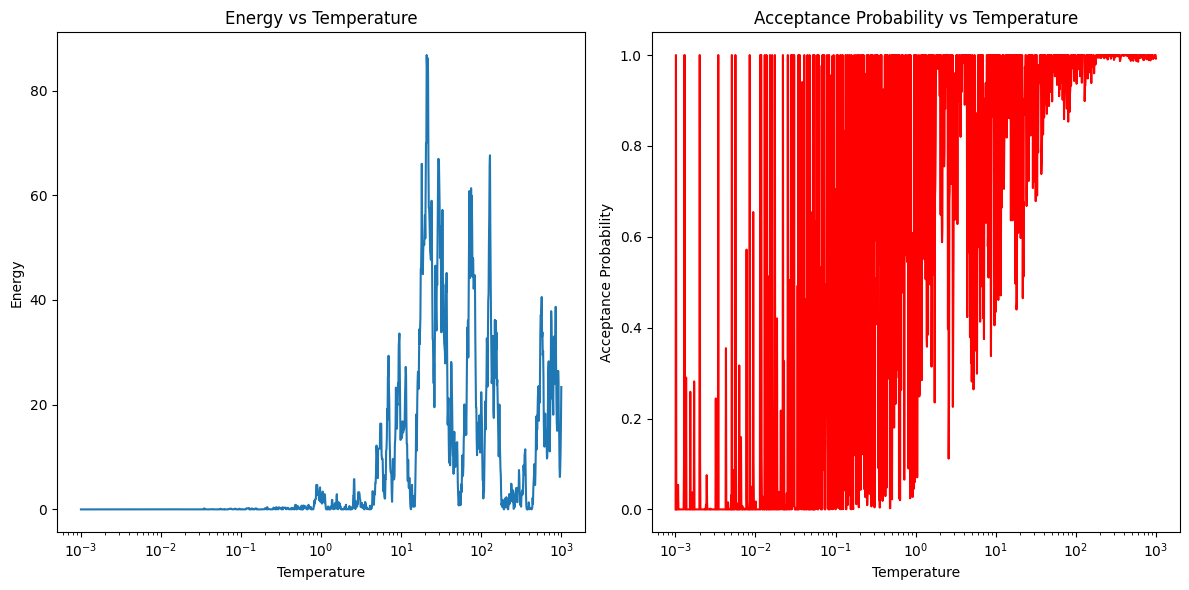

In [31]:
#Q no.8 the effect of temperature on the probability of choosing an inferior node by selecting an appropriate temperature schedule
import numpy as np
import matplotlib.pyplot as plt

# Objective function (minimization problem)
def objective_function(x):
    return x**2  # A simple quadratic function

# Simulated Annealing Algorithm
def simulated_annealing():
    # Initial conditions
    current_temp = 1000  # Starting temperature
    min_temp = 1e-3      # Minimum temperature
    alpha = 0.99         # Cooling rate
    current_state = np.random.uniform(-10, 10)  # Random initial solution
    current_energy = objective_function(current_state)

    # Lists to store data for plotting
    temperatures = []
    energies = []
    probabilities = []

    while current_temp > min_temp:
        # Generate a new candidate by perturbing the current state
        new_state = current_state + np.random.uniform(-1, 1)
        new_energy = objective_function(new_state)

        # Calculate the change in energy (ΔE)
        delta_energy = new_energy - current_energy

        # Probability of accepting the new state
        if delta_energy < 0:
            acceptance_probability = 1  # Always accept a better solution
        else:
            acceptance_probability = np.exp(-delta_energy / current_temp)

        # Decide whether to accept the new state
        if np.random.rand() < acceptance_probability:
            current_state = new_state
            current_energy = new_energy

        # Record the temperature, energy, and acceptance probability
        temperatures.append(current_temp)
        energies.append(current_energy)
        probabilities.append(acceptance_probability)

        # Update the temperature
        current_temp *= alpha

    return temperatures, energies, probabilities

# Run the simulation
temperatures, energies, probabilities = simulated_annealing()

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot temperature vs energy
plt.subplot(1, 2, 1)
plt.plot(temperatures, energies, label="Energy (Objective Value)")
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.title('Energy vs Temperature')
plt.xscale('log')
plt.yscale('linear')

# Plot temperature vs probability of choosing inferior node
plt.subplot(1, 2, 2)
plt.plot(temperatures, probabilities, label="Acceptance Probability", color='r')
plt.xlabel('Temperature')
plt.ylabel('Acceptance Probability')
plt.title('Acceptance Probability vs Temperature')
plt.xscale('log')
plt.yscale('linear')

plt.tight_layout()
plt.show()
